# Heart Disease Prediction using various ML Classification Algorithm

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Reading the data

In [39]:
dataf=pd.read_csv('E:/Documents/Pojects/KrishnNaik/Predicting-Heart-Disease-master/Predicting-Heart-Disease-master/dataset.csv')

In [40]:
dataf.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Checking for null values

In [41]:
dataf.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [42]:
dataf


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
dataf.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### We can see that 'ca' and 'thal' have null values

In [6]:
dataf['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [7]:
dataf['ca'].isnull().sum()

4

In [157]:
dataf['thal'].isnull().sum()

2

#### Since the number of NA values are less we can drop the rows

In [44]:
dataf.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Drop the null values

In [45]:
dd=dataf.dropna(axis=0,inplace=True)

In [46]:
dataf.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Initially the data when reading a column name, gave a Key Error due to the spaces before column names that is why "sep=r'\s* ,\s*'" was added to the read_csv()

In [164]:
print(dataf.columns.tolist())


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


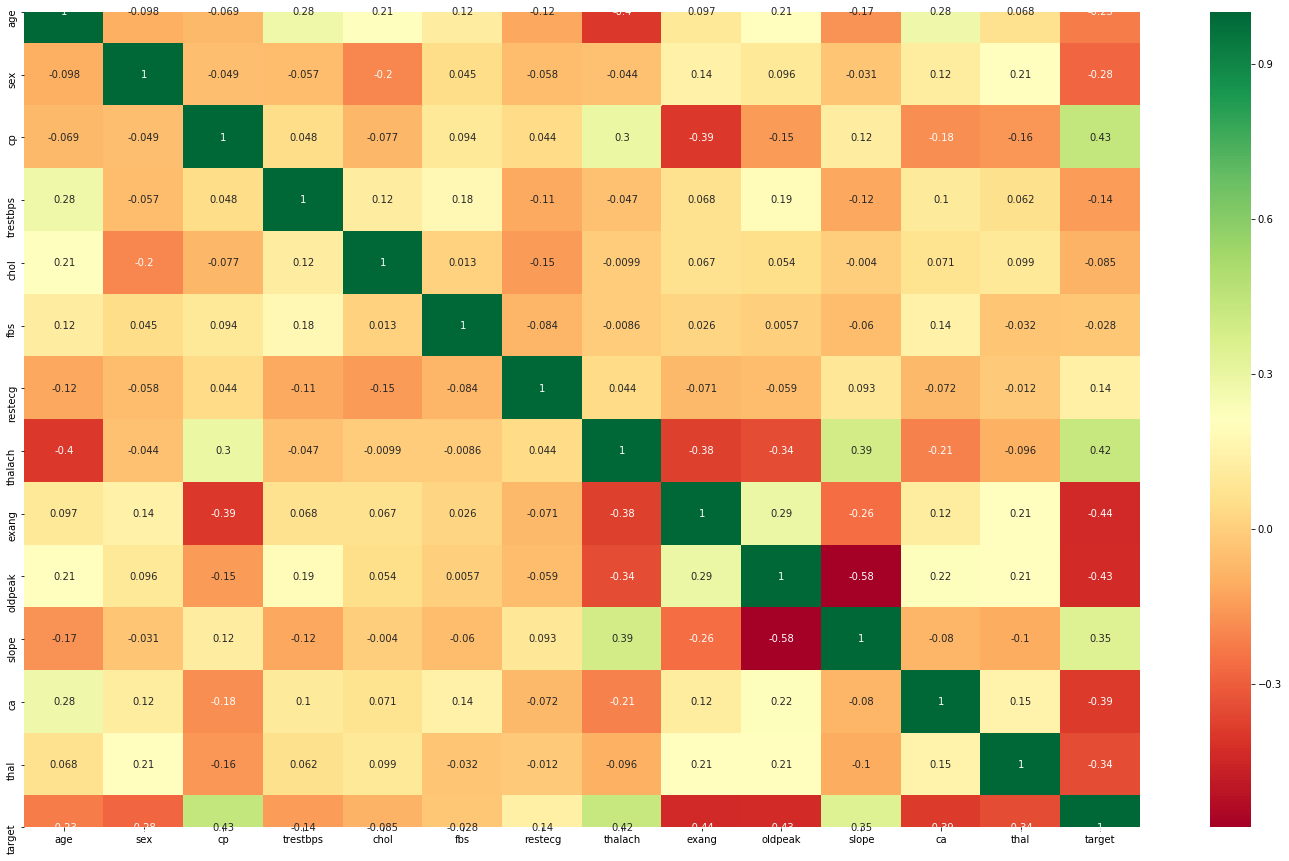

In [47]:
corrmat=dataf.corr()
top_cor_features=corrmat.index

print(top_cor_features)

plt.figure(figsize=(25,15))
g=sns.heatmap(dataf[top_cor_features].corr(),annot=True,cmap='RdYlGn')

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C9022BB908>,
      dtype=object)

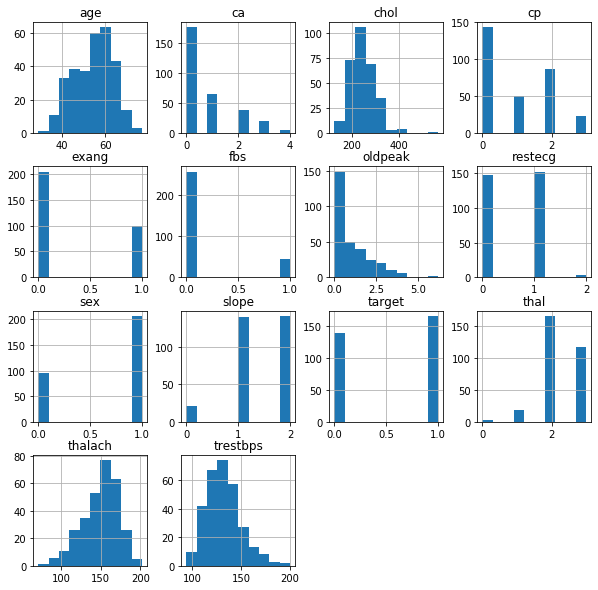

In [87]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
dataf.hist(ax = ax)


In [49]:
dataset = pd.get_dummies(dataf, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [51]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [52]:
dataset.shape

(303, 31)

### Setting the predictor and target variable

In [54]:
y=dataset.target

In [55]:
x=dataset.drop(['target'],axis=1)

In [56]:
y.head(5)


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [57]:
x.head(5)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


### Splitting the dataset into train and test data

In [58]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8)

## Classification Algorithms:


### 1. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics

lr=LogisticRegression()
lr.fit(train_x,train_y)
yhat=lr.predict(test_x)
#lr.score(test_y,yhat)

print(metrics.confusion_matrix(test_y,yhat,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat,labels=[0,1,2,3,4]))

#cvs1=cross_val_score(pipe1,x,y,cv=5)
#print(cvs1)

[[21  6  0  0  0]
 [ 7 27  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.79      0.79      0.79        61
   macro avg       0.31      0.31      0.31        61
weighted avg       0.79      0.79      0.79        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 79%

In [60]:
test_y.value_counts()

1    34
0    27
Name: target, dtype: int64

In [61]:
yhat

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

### 2. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(train_x,train_y)
yhat2=nb.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat2,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat2,labels=[0,1,2,3,4]))

[[19  8  0  0  0]
 [ 5 29  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.79      0.79      0.79        61
   macro avg       0.32      0.31      0.31        61
weighted avg       0.79      0.79      0.79        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 79%

### 3. Stochastic Gradient Descent

In [63]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(train_x,train_y)
yhat3=sgd.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat3,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat3,labels=[0,1,2,3,4]))

[[25  2  0  0  0]
 [ 8 26  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.93      0.76      0.84        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.84      0.84      0.84        61
   macro avg       0.34      0.34      0.33        61
weighted avg       0.85      0.84      0.84        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 84%

In [64]:
yhat3

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### 4. K-Nearest Neighbors

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

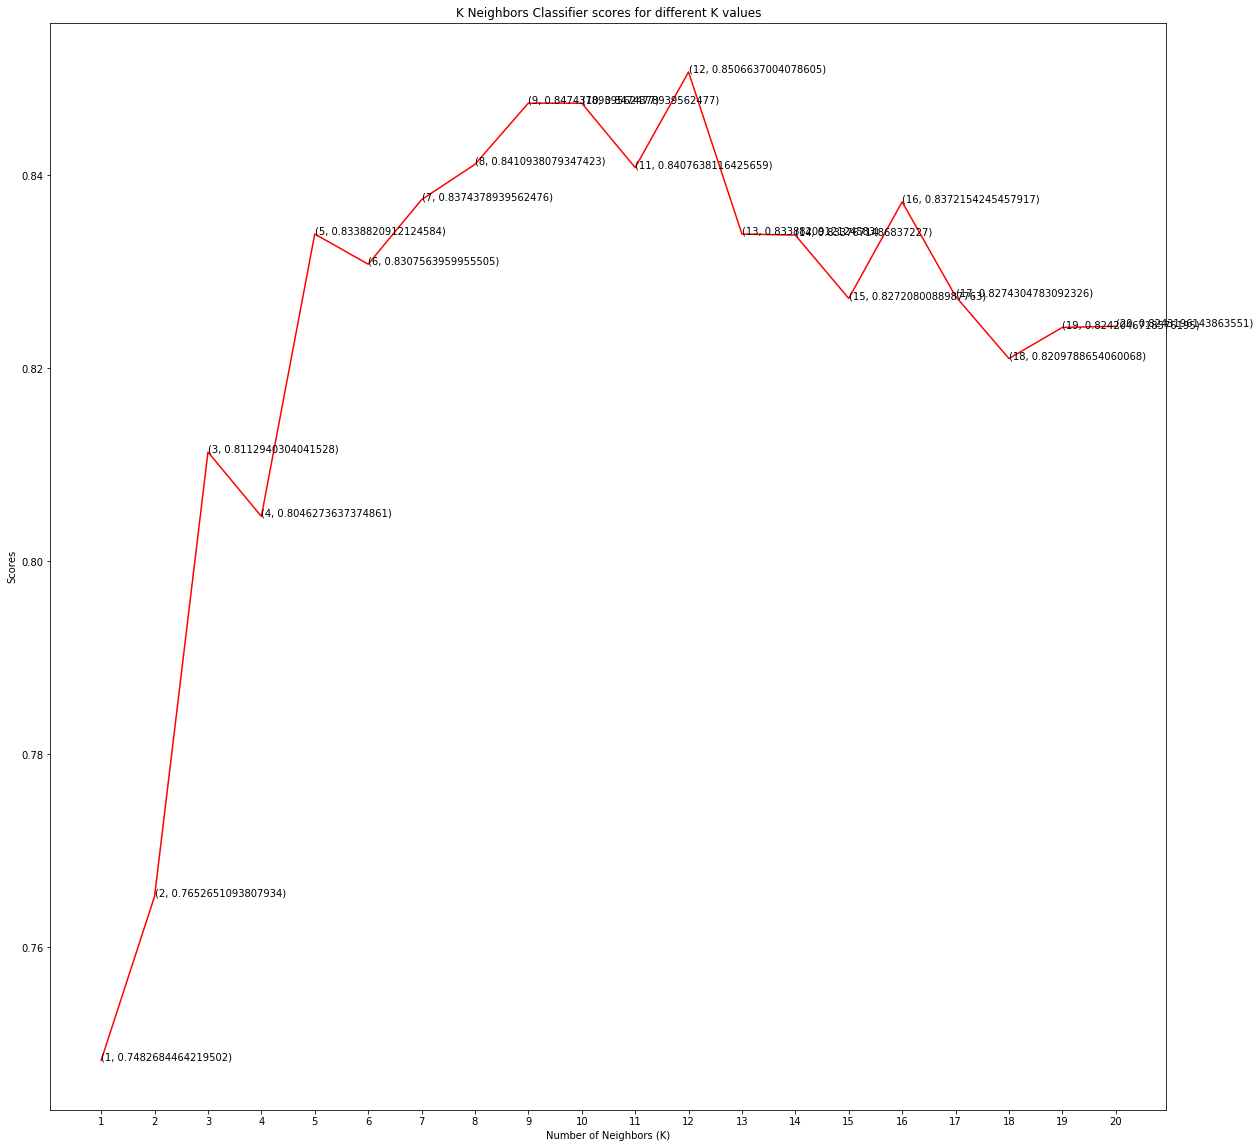

In [76]:
plt.figure(figsize=(20,20))

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
    
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### With cv the accuracy obtained 85.6% for 12 neighbors

In [81]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
yhat4=knn.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat4,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat4,labels=[0,1,2,3,4]))

[[20  7  0  0  0]
 [ 5 29  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.81      0.85      0.83        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80        61
   macro avg       0.32      0.32      0.32        61
weighted avg       0.80      0.80      0.80        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 80%

### 5. Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier


#creting a pipeline with the Decision Tree model as its only step 
dt= DecisionTreeClassifier(random_state=101,max_depth=10,max_features=None,min_samples_leaf=50)
dt.fit(train_x,train_y)
yhat5=dt.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat5,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat5,labels=[0,1,2,3,4]))

[[21  6  0  0  0]
 [ 7 27  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.79      0.79      0.79        61
   macro avg       0.31      0.31      0.31        61
weighted avg       0.79      0.79      0.79        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 79%

### 6. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=20)
rf.fit(train_x,train_y)
yhat6=rf.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat6,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat6,labels=[0,1,2,3,4]))

[[19  8  0  0  0]
 [ 5 29  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.79      0.70      0.75        27
           1       0.78      0.85      0.82        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.79      0.79      0.79        61
   macro avg       0.32      0.31      0.31        61
weighted avg       0.79      0.79      0.79        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 79%

### 7. SVM

In [68]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',C=0.025,random_state=101)
svm.fit(train_x,train_y)
yhat7=svm.predict(test_x)

print(metrics.confusion_matrix(test_y,yhat7,labels=[0,1,2,3,4]))
print(metrics.classification_report(test_y,yhat7,labels=[0,1,2,3,4]))

[[18  9  0  0  0]
 [ 3 31  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80        61
   macro avg       0.33      0.32      0.32        61
weighted avg       0.81      0.80      0.80        61



C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Accuracy obtained: 80%